# Part I - (Exploring Prosper Loan Data)
## by (Solomon Balogun)

## Introduction
> This data set contains data from 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will use data visualization to find trends in the dataset and how the distribution of monthly loan payment varies across different features of the dataset. 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# loading the dataset
path = 'prosperLoanData.csv'
df = pd.read_csv(path)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# checking the shape of the dataset
df.shape

(113937, 81)

In [4]:
# checking the columns in the dataset
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Structure of Dataset

> The dataset has 113937 entries and 81 columns

### Main features of Interest 

> Some of the main features of this dataset are MonthlyLoanPayment and IncomeRange

### Other Important Feature

> IncomeVerifiable, IsBorrowerHomeowner

## Univariate Exploration

In [6]:
# setting the base color
col = sns.color_palette()[0]

In [7]:
#changing income range column to a categorical data type
order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed','Not displayed']
incomerange =  pd.api.types.CategoricalDtype(categories=order, ordered=True)
df.IncomeRange = df.IncomeRange.astype(incomerange)

### Question: How are the income ranges distributed in the dataset?

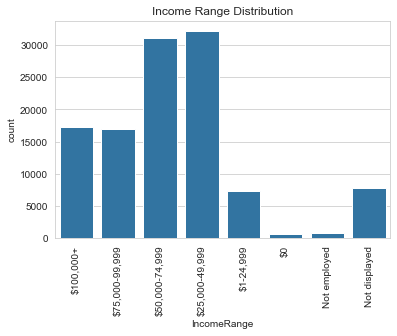

In [12]:
# checking the income distribution across the dataset
sns.countplot(x='IncomeRange',data=df,color=col)
plt.xticks(rotation=90)
plt.title('Income Range Distribution');

We can see most borrowers in the dataset are in the 25,000 to 49,999 and 50,000 to 74,999 income ranges.
Over 100,000 and 75,000 to 99,999 make up the rest of the top four income ranges in the dataset

### Question: What are the states with the highest borrowers?

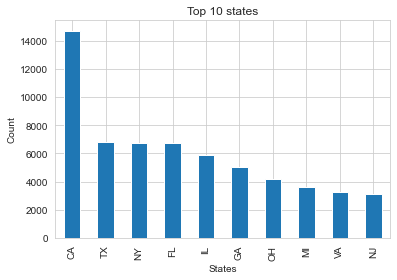

In [13]:
# checking the states with the higest loans
top_states = df.BorrowerState.value_counts().head(10)
top_states.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Top 10 states');

We can see that Carlifonia had the highest number of borrowers by far. Texas, New York and Florida made up the rest of the top four.

### Question: What were the most common loan statuses?

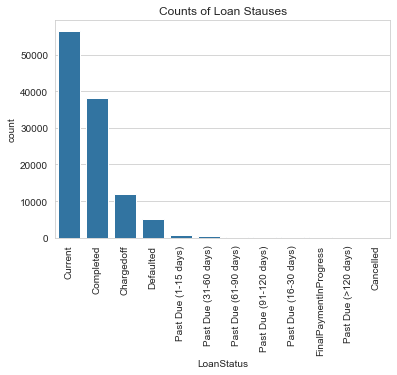

In [9]:
# checking the distribution of loan status
order = df.LoanStatus.value_counts().index
sns.countplot(x='LoanStatus',data=df,color=col,order=order)
plt.xticks(rotation=90)
plt.title('Counts of Loan Stauses');

We can see that most of the loans are current and a large number has been completed.

### Question: How is the monthly loan payment distributed across the dataset?

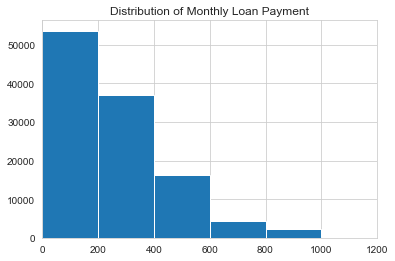

In [16]:
# ploting distribution of monthly loan payments
bins = np.arange(0,2251+200,200)
ticks = [v for v in bins]
plt.hist(x='MonthlyLoanPayment',data=df,bins=bins)
plt.xticks(ticks)
plt.xlim(0,1200)
plt.title('Distribution of Monthly Loan Payment');

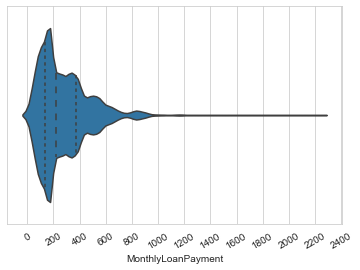

In [17]:
# checking the distrubution of MonthlyLoanPayment
sns.violinplot(x='MonthlyLoanPayment',data=df,inner='quartile')
ticks = np.arange(0,2500,200)
plt.xticks(ticks,rotation=30);

The monthly loan payment has a right-skewed distribution with most of the borrowers paying around 200 as monthly loan payments.

### Question: How is the debt to income ratio distributed?

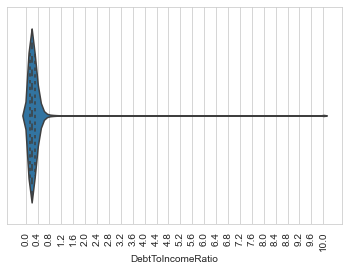

In [18]:
# checking the distrubution of DebtToIncomeRatio
sns.violinplot(x='DebtToIncomeRatio',data=df,inner='quartile')
ticks = np.arange(0,10+0.4,0.4)
plt.xticks(ticks,rotation=90);

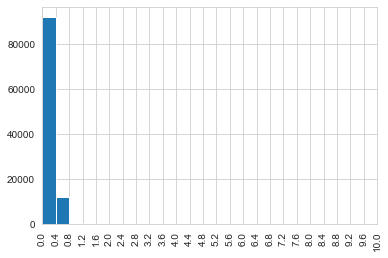

In [19]:
# distribution of DebtToIncomeRatio
bins = np.arange(0,10+0.4,0.4)
ticks = [v for v in bins]
plt.hist(x='DebtToIncomeRatio',data=df,bins=bins)
plt.xlim(0,10)
plt.xticks(ticks,rotation=90);

We can see that most of the borrowers have a debt to income ratio of between 0 to 0.4

### Question: What is the count of home owners and non home owners in the dataset?

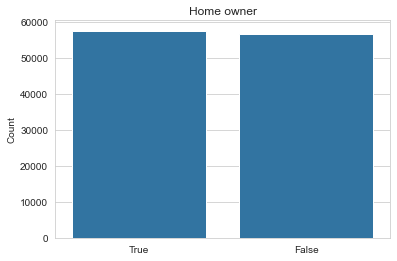

In [21]:
# ploting the distibution of the is home owner coulmn
order = df.IsBorrowerHomeowner.value_counts().index
sns.countplot(x='IsBorrowerHomeowner',data=df,color=col,order=order)
plt.title('Home owner')
plt.ylabel('Count')
plt.xlabel(None);

The dataset is almost split evenly between homeowners and non homeowners.

### Question: What is the count of borrowers with verifiable and non verifiable income?

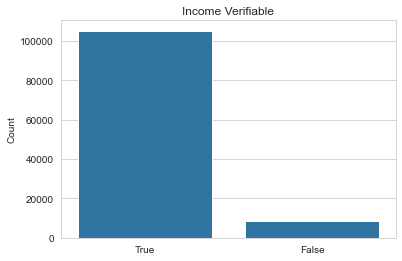

In [22]:
# ploting the distibution of entries with varifiable income
order = df.IncomeVerifiable.value_counts().index
sns.countplot(x='IncomeVerifiable',data=df,color=col,order=order)
plt.title('Income Verifiable')
plt.ylabel('Count')
plt.xlabel(None);

A large majority of borrowers in the dataset have verifible income.

### Observations from Univariate Exploration

* The distribution of the monthly loan payments right-skewed with most of the payments berween 0 and 400
* Most of the borrowers in the dataset fall into the 25,000 to 49,999 and 50,000 to 74,999 income ranges
* 36 months is the term with the highest frequency in the dataset by far
* Dataset is almost split evenly between homeowners and non homeowners
* Most of the loan statuses from the dataset are labeled as current

## Bivariate Exploration

### Question: Is there a relationship between monthly loan payments and stated monthly income?

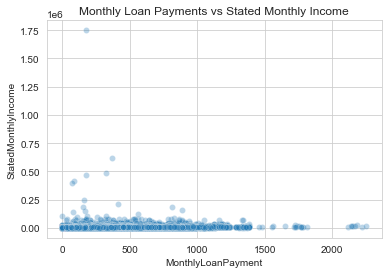

In [71]:
# plotting a scatterplot of monthly loan payments vs stated income
sns.scatterplot(x='MonthlyLoanPayment',y='StatedMonthlyIncome',data=df,alpha=0.3)
plt.title('Monthly Loan Payments vs Stated Monthly Income');

No relationship between these two variables were observed from our scatter plot.

### Question: Is there a relationship between monthly loan payments and debt to income ratio?

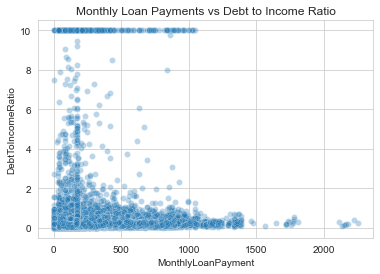

In [72]:
# plotting a scatterplot of monthly loan payments vs debt to income ratio
sns.scatterplot(x='MonthlyLoanPayment',y='DebtToIncomeRatio',data=df,alpha=0.3)
plt.title('Monthly Loan Payments vs Debt to Income Ratio');

No observable relationship between monthly loan payments and debt to income ratio was observed.

### Question: Is there a difference in the distribution of monthly loan payments among borrowers with verifiable and non verifiable income?

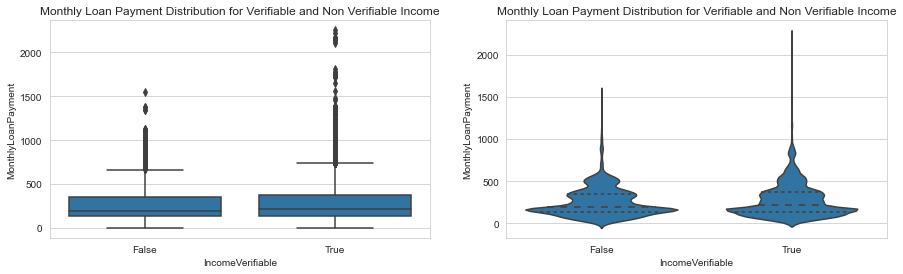

In [102]:
# checking monthly loan payments distribution among borrowers with veriafiable and non varifiable income
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(y='MonthlyLoanPayment',x='IncomeVerifiable',data=df,color=col)
plt.title('Monthly Loan Payment Distribution for Verifiable and Non Verifiable Income')
plt.subplot(1,2,2)
sns.violinplot(y='MonthlyLoanPayment',x='IncomeVerifiable',data=df,color=col,inner='quartile')
plt.title('Monthly Loan Payment Distribution for Verifiable and Non Verifiable Income');

Borrowers with verifiable income have slighly higher loan payments than those without verifiable income.

### Question: Is there a difference in the distribution of monthly loan payments among home owners and non home owners?

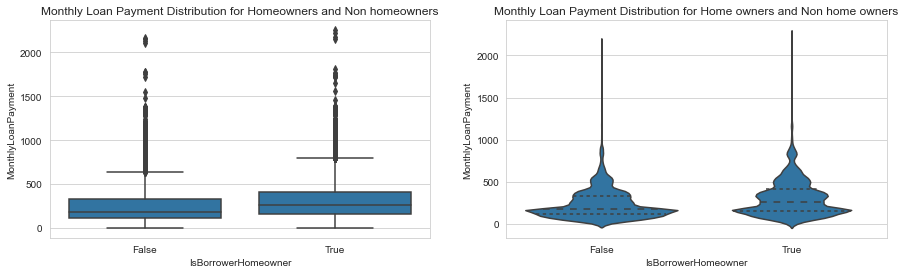

In [10]:
# checking monthly loan payments distribution among homeowners and non home owners
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(y='MonthlyLoanPayment',x='IsBorrowerHomeowner',data=df,color=col)
plt.title('Monthly Loan Payment Distribution for Homeowners and Non homeowners')
plt.subplot(1,2,2)
sns.violinplot(y='MonthlyLoanPayment',x='IsBorrowerHomeowner',data=df,color=col,inner='quartile')
plt.title('Monthly Loan Payment Distribution for Home owners and Non home owners');

Homeowners have higher monthly loan payments than non homeowners in the dataset.

### Question: Is there a difference in the distribution of monthly loan payments among different income ranges?

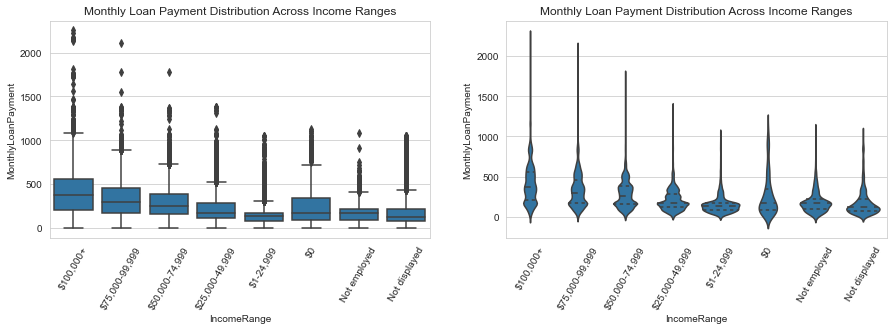

In [107]:
# checking the distribution of monthly loan payments across income ranges
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,color=col)
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distribution Across Income Ranges')
plt.subplot(1,2,2)
sns.violinplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,color=col,inner='quartile')
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distribution Across Income Ranges');

We can see borrowers in the 100,000+ income range have the highest monthly loan payments. Average monthly loan payments appear to drop with decreasing income ranges until the 0 and other unclear income ranges.

### Question: What are the count of home oweners and non home owners across different income ranges?

Text(0.5, 1.0, 'Count of Home Owners by Income Range')

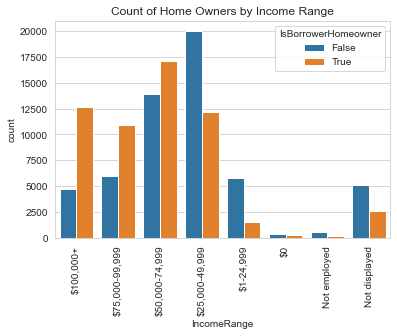

In [29]:
# using a countplot to check for number of home owners by income range
sns.countplot(x='IncomeRange',data=df,hue='IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.title('Count of Home Owners by Income Range')

We can see the top three income ranges have more home owners than non home owners while the rest of the income ranges habe it the other way.

### Question: What are the count of borrowers with verifiable and non verifiable income across different income ranges?

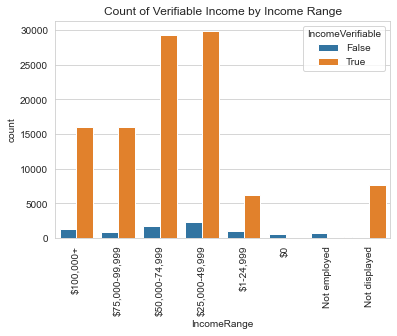

In [32]:
# using a countplot to check for number of people with verifiable income by income range
sns.countplot(x='IncomeRange',data=df,hue='IncomeVerifiable')
plt.xticks(rotation=90)
plt.title('Count of Verifiable Income by Income Range');

All the income ranges are made up a majority of people with verifiable income.

### Question: What are the loan statuses among home owners and non home owners?

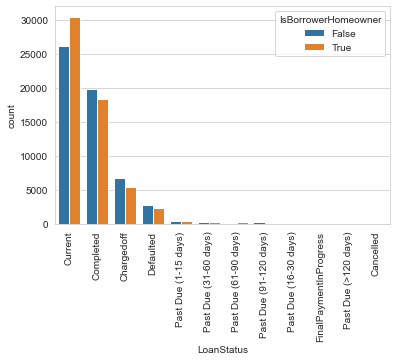

In [20]:
# checking the distribution of loan status among homeowners and nonhomeowners
order = df.LoanStatus.value_counts().index
sns.countplot(x='LoanStatus',data=df,order=order,hue='IsBorrowerHomeowner')
plt.xticks(rotation=90);

We can see the current loan status has a slight majority of home owners while the completed and changedoff status has a slight majority of non homeowners.

### Observations from Bivariate Exploration

* Monthly loan payments are slightly higher for people with verifiable income
* Monthly loan payments are higher for home owners in the dataset
* Monthly loan payments appears to have a direct relationship with income range, borrowers in the higher income ranges have higher monthly loan payments
* Top three income ranges are made up of mostly homeowners while the rest are made up of mostly non home owners

## Multivariate Exploration

### Question: Is the monthly loan payment distribution different among home owners and none home owners in the same income range.

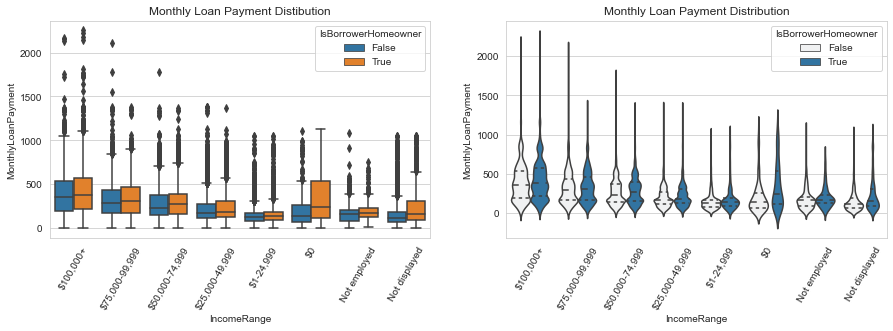

In [40]:
# checking the distribution of monthly loan payments across income ranges for home ownwers and non home owners
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,hue='IsBorrowerHomeowner')
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distibution')
plt.subplot(1,2,2)
sns.violinplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,color=col,inner='quartile',hue='IsBorrowerHomeowner')
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distribution');

We can observe home owners in the same income range have higher monthly loan payments.

### Question: Is the monthly loan payment distribution different among borrowers with verifiable and non verifiable income in the same income range.

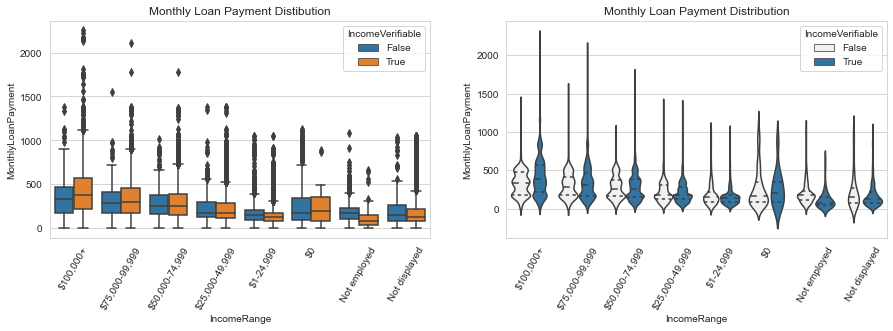

In [41]:
# checking the distribution of monthly loan payments across income ranges for veri3fiable and non verifiable income
fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,hue='IncomeVerifiable')
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distibution')
plt.subplot(1,2,2)
sns.violinplot(x='IncomeRange',y='MonthlyLoanPayment',data=df,color=col,inner='quartile',hue='IncomeVerifiable')
plt.xticks(rotation=60)
plt.title('Monthly Loan Payment Distribution');

We can see that for the 100,000  income range monthly loan payments are slightly higher for people with verifiable income, this is the opposite for borrowers in the not employed income range. Values are very close of the other income ranges.

### Observations from Multivariate Exploration

After the multivariate exploration it was discovered that members of the higher income ranges that were home owners had the highest monthly loan payments in the dataset.

## Conclusions

Analysis was carried out on the loan payment dataset by univariate, bivariate and multivariate exploration:
* Univariate exploration was on the monthly loan payment column to find its distribution inthe dataset, this was also done for other columns of importance
* Multivariate and bivariate exploration was also done to find trends and features that affect the monthly loan payment column the most.

The following were observed from the analysis of this dataset:
* Homeowners and people with verifiably income were observed to have higher monthly loan payment values than others.
* Monthly loan payments appears to have a direct relationship with income range, borrowers in the higher income ranges have higher monthly loan payments